In [1]:
from allensdk.brain_observatory import stimulus_info
import matplotlib.pyplot as plt
import imageio
import numpy as np
import pandas as pd
import os

## define a function to read in the grating stimulus and crop to the actual monitor size

In [2]:
def read_crop_unwarped_grating(grating_angle, monitor_size=[1920, 1200]):
    '''
    read grating image that MPE has saved to disk
    There are four gratings: ori = 0, 90, 180, 270
    saved grating stim are much larger than the actual monitor size
    function returns a grating that is centered and cropped to the display monitor size
    '''
    # get path
    grating_path = "//allen/aibs/mpe/Software/grating images/grating_{}_unwarped.tif".format(grating_angle)
    
    # load grating
    grating = imageio.imread(grating_path)
    
    # center and crop to monitor size
    cropped_grating = grating[
        int(grating.shape[0]/2 - monitor_size[1]/2): int(grating.shape[0]/2 + monitor_size[1]/2),
        int(grating.shape[1]/2 - monitor_size[0]/2): int(grating.shape[1]/2 + monitor_size[0]/2),
        0
    ]
    
    return cropped_grating
    

### define a location to save images

In [3]:
saveloc = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/grating_images'

## display the gratings with the boundaries of the warping mask overlaid, then save
This defines the pixels that will be visible on the screen after the warp  
gray pixels will be outside of the monitor boundary after warping

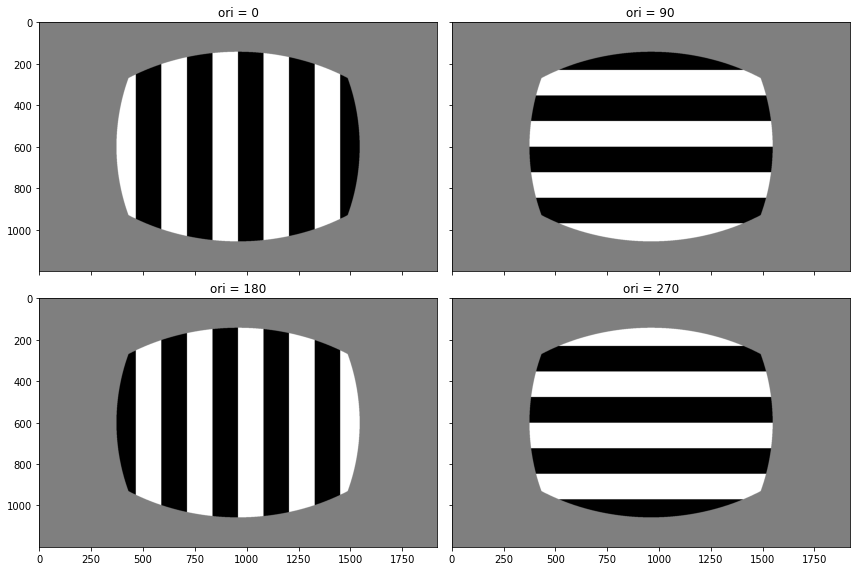

In [4]:
monitor = stimulus_info.Monitor(n_pixels_c=1920, n_pixels_r=1200, panel_size=60.96, spatial_unit='cm')
mask = monitor.get_mask()
mask[mask==0] = np.nan

fig,ax=plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)
for ii,grating_angle in enumerate([0, 90, 180, 270]):
    masked_cropped_grating = read_crop_unwarped_grating(grating_angle)*mask
    masked_cropped_grating[pd.isnull(masked_cropped_grating)] = int(0.5*255)
    ax.flatten()[ii].imshow(
        masked_cropped_grating,
        cmap='gray'
    )
    ax.flatten()[ii].set_title('ori = {}'.format(grating_angle))
    
    imageio.imsave(
        os.path.join(saveloc, 'masked_unwarped_grating_{}.png'.format(grating_angle)), 
        masked_cropped_grating.astype(np.uint8)
    )
    
fig.tight_layout()

## display the gratings after warping, then save
This shows exactly what was on the monitor, after the warping function was applied

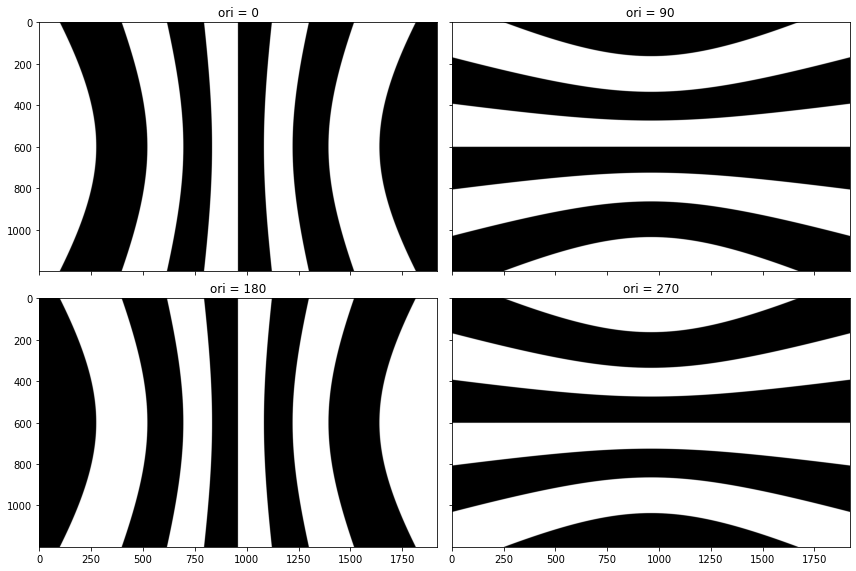

In [5]:
brain_observatory_monitor = stimulus_info.BrainObservatoryMonitor()

fig,ax=plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)
for ii,grating_angle in enumerate([0, 90, 180, 270]):
    masked_cropped_grating = read_crop_unwarped_grating(grating_angle)
    warped_grating = brain_observatory_monitor.warp_image(img=masked_cropped_grating)
    ax.flatten()[ii].imshow(
        warped_grating,
        cmap='gray'
    )
    ax.flatten()[ii].set_title('ori = {}'.format(grating_angle))
    
    imageio.imsave(
        os.path.join(saveloc, 'warped_grating_{}.png'.format(grating_angle)), 
        warped_grating.astype(np.uint8)
    )
    
fig.tight_layout()